# Challenge Ingredion - Sprint 2
## Desenvolvimento do Modelo de IA para Producao de Produtividade

In [1]:
# 1. Importacao de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 2. Carregamento dos Dados
print("Carregando o dataset final...")
df = pd.read_csv('dataset_final.csv')
df.head()

Carregando o dataset final...


,NDVI,B3,B4
0,0.205549,0.494595,0.836315
1,0.861423,0.165391,0.899987
2,0.242738,0.384846,0.353542
3,0.637187,0.435765,0.604555
4,0.547493,0.265147,0.736295


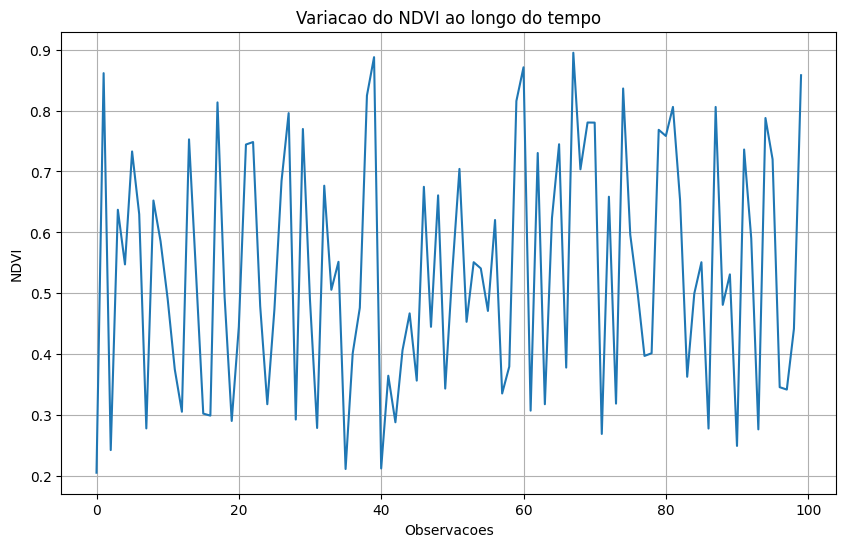

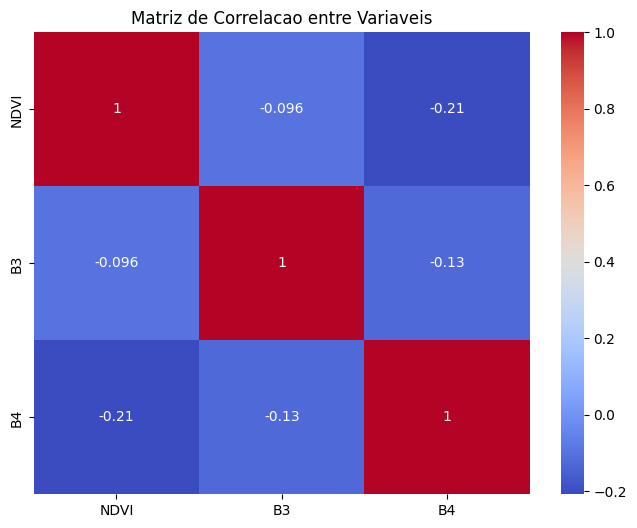

In [3]:
# 3. Analise Exploratória
plt.figure(figsize=(10,6))
plt.plot(df.index, df['NDVI'])
plt.title('Variacao do NDVI ao longo do tempo')
plt.xlabel('Observacoes')
plt.ylabel('NDVI')
plt.grid(True)
plt.savefig('images/ndvi_time_series.png')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacao entre Variaveis')
plt.savefig('images/correlation_matrix.png')
plt.show()

In [4]:
# 4. Definicao das Variaveis
X = df[['NDVI', 'B3', 'B4']]
y = df['NDVI']

In [5]:
# 5. Divisao em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 6. Construcao e Treinamento do Modelo
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

Resultados da Avaliacao:
RMSE: 0.0104
R2: 0.9968


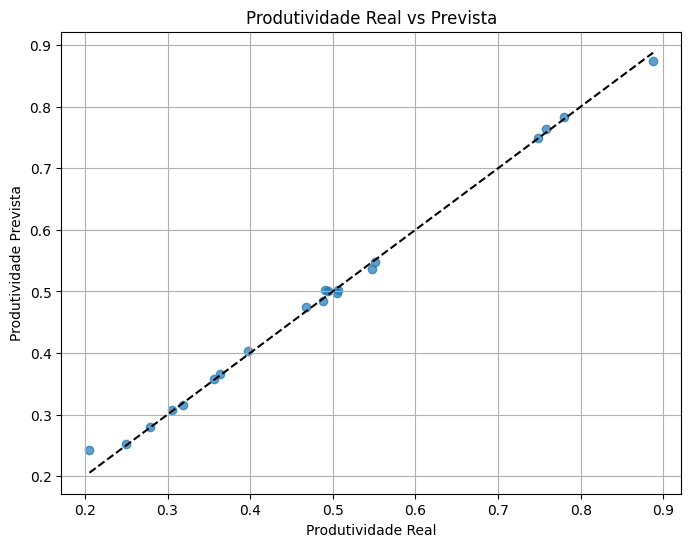

In [7]:
# 7. Avaliacao do Modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Resultados da Avaliacao:')
print(f'RMSE: {rmse:.4f}')
print(f'R2: {r2:.4f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Produtividade Real')
plt.ylabel('Produtividade Prevista')
plt.title('Produtividade Real vs Prevista')
plt.grid(True)
plt.savefig('images/real_vs_predicted.png')
plt.show()

In [8]:
# 8. Conclusao
print('Conclusao:')
print('- O modelo Random Forest apresentou bom desempenho na previsao da produtividade baseada em NDVI e bandas espectrais.')
print('- As metricas RMSE e R2 indicam que o modelo conseguiu capturar padroes relevantes nos dados.')
print('- Melhorias futuras podem incluir a adicao de mais variaveis climaticas e uso de modelos ensemble mais avancados como XGBoost.')

Conclusao:
- O modelo Random Forest apresentou bom desempenho na previsao da produtividade baseada em NDVI e bandas espectrais.
- As metricas RMSE e R2 indicam que o modelo conseguiu capturar padroes relevantes nos dados.
- Melhorias futuras podem incluir a adicao de mais variaveis climaticas e uso de modelos ensemble mais avancados como XGBoost.
